# TFT pytorch model with baseline-v-0-raw.parquet
- The notebook is creating a model with sample data/code in Pytorch webpage

https://pytorch-forecasting.readthedocs.io/en/stable/_modules/pytorch_forecasting/models/temporal_fusion_transformer.html

Goal of the notebook
  - Create sample TFT model from data loading ~ prediction. 
  - Based on this notebook, the simple dataset in our study is applied to TFT model in the next notebook(link to be updated) 

- Edited by Rumi Nakagawa
- Spring 2023 Capstone


## Other references:
TFT with pytorch

1. https://pytorch-forecasting.readthedocs.io/en/stable/tutorials/stallion.html

2. https://pytorch-forecasting.readthedocs.io/en/stable/_modules/pytorch_forecasting/models/temporal_fusion_transformer.html

3. https://github.com/NVIDIA/DeepLearningExamples/tree/master/PyTorch/Forecasting/TFT#getting-the-data

4. https://towardsdatascience.com/temporal-fusion-transformer-time-series-forecasting-with-deep-learning-complete-tutorial-d32c1e51cd91

TFT with Tensorflow
1. https://github.com/greatwhiz/tft_tf2

2. https://towardsdatascience.com/temporal-fusion-transformer-googles-model-for-interpretable-time-series-forecasting-5aa17beb621


# 0. Preparation

## Mount google drive
- Make sure that available access is the user's own drive(no access across files in shared folder)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd drive/MyDrive/TFT_baseline
%cd TFT_baseline

/content/drive/MyDrive/TFT_baseline
[Errno 2] No such file or directory: 'TFT_baseline'
/content/drive/MyDrive/TFT_baseline


In [4]:
if 'google.colab' in str(get_ipython()):
  IN_COLLAB = True
else:
  IN_COLLAB = False

#TODO: CHANGE THIS BASED ON YOUR OWN LOCAL SETTINGS
# MY_HOME_ABS_PATH = "/content/drive/MyDrive/W210/co2-flux-hourly-gpp-modeling"
MY_HOME_ABS_PATH =  "/content/drive/MyDrive"

In [5]:
# This is already done above
# if IN_COLLAB:
#   from google.colab import drive
#   drive.mount('/content/drive/')

## Import libraries

In [6]:
import os
import warnings

warnings.filterwarnings("ignore")  # avoid printing out absolute paths
print(os.getcwd())
# os.chdir("../../..")

/content/drive/MyDrive/TFT_baseline


#### (pip install)

In [7]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.4/826.4 KB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 51.2 MB/s eta 0:00:00


In [8]:
!pip install pytorch_forecasting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 KB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 KB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 17.5 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=b068fec7a832e90bb2bebcd78ee387127c1941fc7

In [9]:
! pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 96.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [10]:
# This is must in order to avoid error 
!pip install pytorch_lightning==1.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 2.7 MB/s eta 0:00:00
  Attempting uninstall: pytorch_lightning
    Found existing installation: pytorch-lightning 1.9.3
    Uninstalling pytorch-lightning-1.9.3:
      Successfully uninstalled pytorch-lightning-1.9.3


numba may potentially needed later

In [11]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!pip install azure.storage.blob 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 KB 23.1 MB/s eta 0:00:00


### pytorch libraries

In [13]:
import copy
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
from pytorch_forecasting import BaseModel, MAE


In [14]:
from pytorch_forecasting.metrics.point import RMSE
from pytorch_forecasting.data.encoders import NaNLabelEncoder

# Load data from Azure blob

In [15]:
MY_HOME_ABS_PATH

'/content/drive/MyDrive'

In [16]:
import sys
sys.path.append('/content/drive/MyDrive/.cred')
sys.path.append('/content/drive/MyDrive/tools')
sys.path.append('/content/drive/MyDrive/tools/CloudIO')

In [17]:
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
import math
import json

from calendar import monthrange
from datetime import datetime
from io import BytesIO

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load locale custome modules
import sys
if IN_COLLAB:
  os.chdir(MY_HOME_ABS_PATH)
  # sys.path.insert(0,os.path.abspath("./code/src/tools"))
  sys.path.insert(0,os.path.abspath("tools"))
else:
  sys.path.append(os.path.abspath("tools"))

from CloudIO.AzStorageClient import AzStorageClient
from data_pipeline_lib import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
  

In [18]:
root_dir =  MY_HOME_ABS_PATH
tmp_dir =  root_dir + os.sep + '.tmp'
raw_data_dir = tmp_dir
data_dir = root_dir + os.sep + 'data'
cred_dir = root_dir + os.sep + '.cred'
az_cred_file = cred_dir + os.sep + 'azblobcred.json'

# if IN_COLLAB:
#   raw_data_dir = "/content/drive/MyDrive/CO2_flux_gpp_modeling/DS_capstone_23Spring_CO2/Data/half_hourly_data"

In [19]:
# AzStorageClient.listBlobs(container)
container = "baseline-data"
cred_file = az_cred_file
ext = "parquet"

In [20]:
from azure.storage.blob import BlobServiceClient

if os.path.exists(cred_file):
  connect_str = ""
  with open(cred_file, "rb") as f:
      data = json.load(f)
      connect_str = data['connectionstr']
      blob_svc_client = BlobServiceClient.from_connection_string(connect_str)
      tokens = connect_str.split(';')
      for t in tokens:
        if "AccountName=" in t:
          AccountName = t[len("AccountName="):]
        elif "AccountKey=" in t:
          AccountKey = t[len("AccountKey="):]

In [21]:
# Container and file name
container = "baseline-data"
blob_name_train = "baseline-train-v-0-raw.parquet"
blob_name_val = "baseline-test-v-0-raw.parquet"

In [62]:
# Download the parquet file if there is not local copy
# ref: https://stackoverflow.com/a/68940709

train_df_0 = None
if not (os.path.exists(tmp_dir+blob_name_train)):
    # Initialized Azure Storage Client
    azStorageClient = AzStorageClient(az_cred_file)
    # Download blob to stream
    file_stream = azStorageClient.downloadBlob2Stream(container, blob_name_train)
    # read parquet
    train_df_0 = pd.read_parquet(file_stream, engine='pyarrow')
    train_df_0.to_parquet(tmp_dir + blob_name_train)
else:
    train_df_0 = pd.read_parquet(tmp_dir + blob_name_train)

print(f"size: {train_df_0.shape}")
train_df_0.head()

size: (1485926, 33)


GPP_NT_VUT_REF  TA_ERA  SW_IN_ERA  LW_IN_ERA  VPD_ERA   P_ERA   PA_ERA  \
16228        -0.53574 5.31100   25.01600  272.21800  1.70800 0.00000 97.93900   
16229         0.86438 5.74400   59.73400  272.21800  1.73800 0.00000 97.93900   
16230        -0.02627 6.17600   91.23500  272.21800  1.76700 0.00000 97.93900   
16231        -0.17229 6.60800   79.26400  333.93300  1.79700 0.05000 97.93900   
16232         1.20865 7.04300   94.92900  333.93300  1.81700 0.00000 97.92300   

                 datetime  year  month  day  hour     EVI    NDVI    NIRv  \
16228 2001-01-01 08:30:00  2001      1    1     8 0.24998 0.73349 0.10592   
16229 2001-01-01 09:00:00  2001      1    1     9 0.24998 0.73349 0.10592   
16230 2001-01-01 09:30:00  2001      1    1     9 0.24998 0.73349 0.10592   
16231 2001-01-01 10:00:00  2001      1    1    10 0.24998 0.73349 0.10592   
16232 2001-01-01 10:30:00  2001      1    1    10 0.24998 0.73349 0.10592   

           b1      b2      b3      b4      b5      b6      b7 IGBP     koppen  \
16228 0.02220 0.14440 0.00740 0.02670 0.14860 0.09770 0.00000  EBF  Temperate   
16229 0.02220 0.14440 0.00740 0.02670 0.14860 0.09770 0.00000  EBF  Temperate   
16230 0.02220 0.14440 0.00740 0.02670 0.14860 0.09770 0.00000  EBF  Temperate   
16231 0.02220 0.14440 0.00740 0.02670 0.14860 0.09770 0.00000  EBF  Temperate   
16232 0.02220 0.14440 0.00740 0.02670 0.14860 0.09770 0.00000  EBF  Temperate   

       minute site_id  timestep_idx  elevation      lat    long  koppen_sub  \
16228      30  FR-Pue          7649  270.00000 43.74130 3.59570           8   
16229       0  FR-Pue          7650  270.00000 43.74130 3.59570           8   
16230      30  FR-Pue          7651  270.00000 43.74130 3.59570           8   
16231       0  FR-Pue          7652  270.00000 43.74130 3.59570           8   
16232      30  FR-Pue          7653  270.00000 43.74130 3.59570           8   

      c3c4  c4_percent  
16228   C3     6.59000  
16229   C3     6.59000  
16230   C3     6.59000  
16231   C3     6.59000  
16232   C3     6.59000

In [75]:

test_df_0 = None
if not (os.path.exists(tmp_dir+blob_name_val)):
    # Initialized Azure Storage Client
    azStorageClient = AzStorageClient(az_cred_file)
    # Download blob to stream
    file_stream = azStorageClient.downloadBlob2Stream(container, blob_name_val)
    # read parquet
    test_df_0 = pd.read_parquet(file_stream, engine='pyarrow')
    test_df_0.to_parquet(tmp_dir + blob_name_val)
else:
    test_df_0 = pd.read_parquet(tmp_dir + blob_name_val)

print(f"size: {test_df_0.shape}")
test_df_0.head()

size: (559201, 33)


GPP_NT_VUT_REF  TA_ERA  SW_IN_ERA  LW_IN_ERA  VPD_ERA   P_ERA  \
133428         2.19090 4.66000    5.44900  218.92000  2.90400 0.00000   
133429         2.83647 5.08600   71.31800  218.92000  2.95200 0.00000   
133430         4.03906 5.51100  132.32000  218.92000  3.00000 0.00000   
133431         7.79772 5.93700  187.41100  218.92000  3.04800 0.00000   
133432         6.93281 6.36200  235.65000  218.92000  3.09600 0.00000   

          PA_ERA            datetime  year  month  day  hour     EVI    NDVI  \
133428 100.76500 2001-01-01 07:30:00  2001      1    1     7 0.30272 0.74517   
133429 100.78900 2001-01-01 08:00:00  2001      1    1     8 0.30272 0.74517   
133430 100.81300 2001-01-01 08:30:00  2001      1    1     8 0.30272 0.74517   
133431 100.83700 2001-01-01 09:00:00  2001      1    1     9 0.30272 0.74517   
133432 100.86100 2001-01-01 09:30:00  2001      1    1     9 0.30272 0.74517   

          NIRv      b1      b2      b3      b4      b5      b6      b7 IGBP  \
133428 0.12452 0.02440 0.16710 0.01800 0.02910 0.23520 0.09770 0.04840  EBF   
133429 0.12452 0.02440 0.16710 0.01800 0.02910 0.23520 0.09770 0.04840  EBF   
133430 0.12452 0.02440 0.16710 0.01800 0.02910 0.23520 0.09770 0.04840  EBF   
133431 0.12452 0.02440 0.16710 0.01800 0.02910 0.23520 0.09770 0.04840  EBF   
133432 0.12452 0.02440 0.16710 0.01800 0.02910 0.23520 0.09770 0.04840  EBF   

           koppen  minute site_id  timestep_idx  elevation      lat     long  \
133428  Temperate      30  IT-Cpz         13743   68.00000 41.70525 12.37611   
133429  Temperate       0  IT-Cpz         13744   68.00000 41.70525 12.37611   
133430  Temperate      30  IT-Cpz         13745   68.00000 41.70525 12.37611   
133431  Temperate       0  IT-Cpz         13746   68.00000 41.70525 12.37611   
133432  Temperate      30  IT-Cpz         13747   68.00000 41.70525 12.37611   

        koppen_sub c3c4  c4_percent  
133428           8   C3     0.00000  
133429           8   C3     0.00000  
133430           8   C3     0.00000  
133431           8   C3     0.00000  
133432           8   C3     0.00000

In [76]:
train_df_0['site_id'].unique()

array(['FR-Pue', 'US-NR1', 'US-SRM', 'US-Ton', 'US-Var', 'US-Wkg',
       'US-ARM', 'US-Me2', 'US-UMB', 'US-Vcp', 'CH-Lae', 'ES-LJu',
       'FI-Hyy', 'IT-Lav'], dtype=object)

In [77]:
test_df_0['site_id'].unique()

array(['IT-Cpz', 'US-GLE', 'CA-Cbo', 'US-AR1', 'US-FR2', 'US-Seg',
       'ES-LM2', 'FR-Lam', 'IT-Lsn'], dtype=object)

# Data Preprocessing

## Overview of the dataset

In [82]:
train_df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485926 entries, 16228 to 2021172
Data columns (total 31 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   GPP_NT_VUT_REF  1485926 non-null  float64       
 1   site_id         1485926 non-null  object        
 2   datetime        1485926 non-null  datetime64[ns]
 3   timestep_idx    1485926 non-null  int64         
 4   month           1485926 non-null  int64         
 5   hour            1485926 non-null  int64         
 6   TA_ERA          1485926 non-null  float64       
 7   SW_IN_ERA       1485926 non-null  float64       
 8   LW_IN_ERA       1485926 non-null  float64       
 9   VPD_ERA         1485926 non-null  float64       
 10  P_ERA           1485926 non-null  float64       
 11  PA_ERA          1485926 non-null  float64       
 12  EVI             1485926 non-null  float64       
 13  NDVI            1485926 non-null  float64       
 14  NIRv          

## Check NaN values in the dataframe

In [149]:
train_df_0.isna().sum()

GPP_NT_VUT_REF    0
site_id           0
datetime          0
timestep_idx      0
month             0
hour              0
TA_ERA            0
SW_IN_ERA         0
LW_IN_ERA         0
VPD_ERA           0
P_ERA             0
PA_ERA            0
EVI               0
NDVI              0
NIRv              0
b1                0
b2                0
b3                0
b4                0
b5                0
b6                0
b7                0
elevation         0
lat               0
long              0
year              0
day               0
IGBP              0
koppen            0
minute            0
koppen_sub        0
dtype: int64

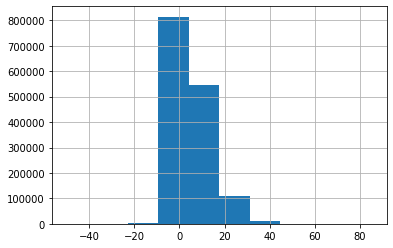

In [84]:
# Check distribution of specifica data
# This was done when the GroupNormalizer caused error. 
  # Error message showed NaN/ infinite number in GPP, while there were neither NA nor infinite values
  # Error was solved by using default(best normalizer was automatically assigned)
train_df_0['GPP_NT_VUT_REF'].hist()

In [85]:
train_df_0.columns

Index(['GPP_NT_VUT_REF', 'site_id', 'datetime', 'timestep_idx', 'month',
       'hour', 'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA', 'P_ERA',
       'PA_ERA', 'EVI', 'NDVI', 'NIRv', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
       'b7', 'elevation', 'lat', 'long', 'year', 'day', 'IGBP', 'koppen',
       'minute', 'koppen_sub'],
      dtype='object')

## Add time index to df

- `time_idx` determines the sequence of samples. This is used in TS dataset in pytorch. It is also used to make aggregated static features easier when there are multiple observations with same time point. 

- We could also create categorical features by using average or convert time features to categorical features(Ex. month)

In [86]:
train_df_0.columns

Index(['GPP_NT_VUT_REF', 'site_id', 'datetime', 'timestep_idx', 'month',
       'hour', 'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA', 'P_ERA',
       'PA_ERA', 'EVI', 'NDVI', 'NIRv', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
       'b7', 'elevation', 'lat', 'long', 'year', 'day', 'IGBP', 'koppen',
       'minute', 'koppen_sub'],
      dtype='object')

In [87]:
# Slim down features to make a model simpler
features = ['GPP_NT_VUT_REF', 'site_id','datetime','timestep_idx','month','hour',
                   'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA','P_ERA', 'PA_ERA',
                   'EVI', 'NDVI', 'NIRv', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 
                   'elevation', 'lat', 'long', 
                   'year','day','IGBP','koppen','minute','koppen_sub']

train_df_0 = train_df_0[features]
test_df_0 = test_df_0[features]

# c3c4
# c4_percent not included

# Define train/val/test set

## Define period

### Choose small period with larger available values

In [88]:
print(train_df_0.groupby(['year'])['datetime'].count()) #,'month'

year
2001     35323
2002     39420
2003     60708
2004     82370
2005     87349
2006     89626
2007    108047
2008    105274
2009    110778
2010    106911
2011    106204
2012    106994
2013    105787
2014    109126
2015     56903
2016     59235
2017     52953
2018     33508
2019     22586
2020      6824
Name: datetime, dtype: int64


In [56]:
# pick up July in 2014
train_df_0[train_df_0['year']>=2007][train_df_0['year']<=2014].groupby(['year','month'])['datetime'].count() #

year  month
2007  1         5440
      2         6225
      3         9281
      4        10101
      5        12369
      6        10447
      7        11932
      8        11576
      9         9849
      10        9365
      11        6658
      12        4804
2008  1         5316
      2         6339
      3         8213
      4         9773
      5        10694
      6        11488
      7        12257
      8        11577
      9         9178
      10        8353
      11        6736
      12        5350
2009  1         6128
      2         6612
      3         8723
      4        10064
      5        12213
      6        11477
      7        12758
      8        11463
      9         9760
      10        9069
      11        6946
      12        5565
2010  1         5454
      2         5848
      3         7553
      4         9966
      5        11170
      6        11806
      7        12565
      8        11844
      9        10223
      10        9077
      11        6465
 

In [57]:
# pick up July 1-7 for training/encoding and 8,9 for prediction
train_df_0[train_df_0['year']==2014][train_df_0['month']==7].groupby(['day'])['datetime'].count() #

day
1     425
2     425
3     425
4     425
5     422
6     424
7     423
8     423
9     423
10    422
11    422
12    420
13    419
14    419
15    417
16    417
17    415
18    416
19    416
20    415
21    413
22    411
23    411
24    410
25    411
26    409
27    377
28    375
29    373
30    402
31    401
Name: datetime, dtype: int64

In [89]:
print(test_df_0.groupby(['year'])['datetime'].count()) #,'month'

year
2001     7648
2002    12492
2003    13150
2004     6766
2005    32103
2006    36758
2007    44630
2008    43230
2009    35112
2010    37877
2011    35971
2012    34806
2013    28736
2014    36232
2015    24983
2016    33925
2017    28823
2018    25216
2019    24945
2020    15798
Name: datetime, dtype: int64


In [91]:
test_df_0[test_df_0['year']==2014].groupby(['month'])['datetime'].count() #

month
1     1759
2     1248
3     2234
4     3497
5     3658
6     4379
7     4213
8     4220
9     3696
10    3398
11    2053
12    1877
Name: datetime, dtype: int64

## Filter orignal train set

In [99]:
train_df = train_df_0[train_df_0['year']==2014][train_df_0['month']==7][train_df_0['day']<=14]
# val_df = train_df_0[train_df_0['year']==2014][train_df_0['month']==7][train_df_0['day']>=8][train_df_0['day']<=14]
test_df = test_df_0[test_df_0['year']==2014][test_df_0['month']==7][test_df_0['day']>=8][test_df_0['day']<=14]

In [145]:
# # Add time index

# Code from sample data
# data_df["time_idx"] = data_df["year"]*24*30* + data_df["month"]*24*30 + data_df["day"]*24 + data_df["hour"]# year times 12 + month and find the time "ID"
# data_df["time_idx"] -= data_df["time_idx"].min() # substract minimum "ID" from the original to reduce the magnitude of IDs  

# Train df
train_df["time_idx"] = train_df['datetime'].rank(method='dense').sub(1).astype(int)

# Show some time values in earlier/middle/later values of indices
print(f'time index = 0 {train_df[train_df["time_idx"] == 0]["datetime"]}')
print("")
print(f'time index = 1 {train_df[train_df["time_idx"] == 1]["datetime"]}')
print("")
print(f'time index = mean({int(train_df["time_idx"].mean())}) {train_df[train_df["time_idx"] == int(train_df["time_idx"].mean())]["datetime"]}')
print("")
print(f'time index = max({int(train_df["time_idx"].median())}) {train_df[train_df["time_idx"] == int(train_df["time_idx"].median())]["datetime"]}')
print("")
print(f'time index = max({int(train_df["time_idx"].max())}) {train_df[train_df["time_idx"] == int(train_df["time_idx"].max())]["datetime"]}')

# validation df
test_df["time_idx"] = test_df['datetime'].rank(method='dense').sub(1).astype(int)

# Show some time values in earlier/middle/later values of indices
print(f'time index = 0 {test_df[test_df["time_idx"] == 0]["datetime"]}')
print("")
print(f'time index = 1 {test_df[test_df["time_idx"] == 1]["datetime"]}')
print("")
print(f'time index = mean({int(test_df["time_idx"].mean())}) {test_df[test_df["time_idx"] == int(test_df["time_idx"].mean())]["datetime"]}')
print("")
print(f'time index = max({int(test_df["time_idx"].median())}) {test_df[test_df["time_idx"] == int(test_df["time_idx"].median())]["datetime"]}')
print("")
print(f'time index = max({int(test_df["time_idx"].max())}) {test_df[test_df["time_idx"] == int(test_df["time_idx"].max())]["datetime"]}')


# # Code sample from sample data(We might want to use average data data)
# # add additional features
train_df["month"] = train_df.month.astype(str).astype("category")  # categories have be strings
test_df["month"] = test_df.month.astype(str).astype("category")  # categories have be strings
train_df["year"] = train_df.year.astype(str).astype("category")  # categories have be strings
test_df["year"] = test_df.year.astype(str).astype("category")  # categories have be strings
train_df["minute"] = train_df.minute.astype(str).astype("category")  # categories have be strings
test_df["minute"] = test_df.minute.astype(str).astype("category")  # categories have be strings
train_df["hour"] = train_df.hour.astype(str).astype("category")  # categories have be strings
test_df["hour"] = test_df.hour.astype(str).astype("category")  # categories have be strings
train_df["day"] = train_df.day.astype(str).astype("category")  # categories have be strings
test_df["day"] = test_df.day.astype(str).astype("category")  # categories have be strings
train_df["koppen_sub"] = train_df.koppen_sub.astype(str).astype("category")  # categories have be strings
test_df["koppen_sub"] = test_df.koppen_sub.astype(str).astype("category")  # categories have be strings
# # data_df["log_volume"] = np.log(data_df.volume + 1e-8)
# # data_df["avg_volume_by_sku"] = data_df.groupby(["time_idx", "sku"], observed=True).volume.transform("mean")
# # data_df["avg_volume_by_agency"] = data_df.groupby(["time_idx", "agency"], observed=True).volume.transform("mean")

# # we want to encode special days as one variable and thus need to first reverse one-hot encoding
# # special_days = [
# #     "easter_day",
# #     "good_friday",
# #     "new_year",
# #     "christmas",
# #     "labor_day",
# #     "independence_day",
# #     "revolution_day_memorial",
# #     "regional_games",
# #     "fifa_u_17_world_cup",
# #     "football_gold_cup",
# #     "beer_capital",
# #     "music_fest",
# # ]
# # data_df[special_days] = data_df[special_days].apply(lambda x: x.map({0: "-", 1: x.name})).astype("category")
# # data_df.sample(10, random_state=521)

time index = 0 1748305   2014-07-01 03:00:00
Name: datetime, dtype: datetime64[ns]

time index = 1 1748306   2014-07-01 03:30:00
Name: datetime, dtype: datetime64[ns]

time index = mean(264) 1748569   2014-07-07 21:00:00
Name: datetime, dtype: datetime64[ns]

time index = max(261) 129373    2014-07-07 19:30:00
966457    2014-07-07 19:30:00
1107669   2014-07-07 19:30:00
1272793   2014-07-07 19:30:00
1447816   2014-07-07 19:30:00
1556963   2014-07-07 19:30:00
1748566   2014-07-07 19:30:00
1982681   2014-07-07 19:30:00
Name: datetime, dtype: datetime64[ns]

time index = max(528) 1748833   2014-07-14 21:00:00
Name: datetime, dtype: datetime64[ns]
time index = 0 243911   2014-07-08 04:30:00
Name: datetime, dtype: datetime64[ns]

time index = 1 243912    2014-07-08 05:00:00
843955    2014-07-08 05:00:00
1193523   2014-07-08 05:00:00
Name: datetime, dtype: datetime64[ns]

time index = mean(112) 244014    2014-07-11 12:00:00
844059    2014-07-11 12:00:00
1193624   2014-07-11 12:00:00
1601587  

In [118]:
print(f'Min time index for train: {train_df["time_idx"].min()}, Max time index for test: {train_df["time_idx"].max()}')
print(f'Min time index for train: {test_df["time_idx"].min()}, Max time index for test: {test_df["time_idx"].max()}')
# print(f'Min time index: {val_df["time_idx"].min()}, Max time index: {val_df["time_idx"].max()}')

# val_df = train_df_0[train_df_0['year']==2014][train_df_0['month']==7][train_df_0['day']>=8][train_df_0['day']<=14]
print(f'Min time index for val: {train_df[train_df["day"]=="8"]["time_idx"].min()}, Max time index for val: {train_df[train_df["day"]=="14"]["time_idx"].max()}')

Min time index for train: 0, Max time index for test: 528
Min time index for train: 0, Max time index for test: 225
Min time index for val: 266, Max time index for val: 528


## Define cutoff of train - validation

In [120]:
# (data is already splited to train/validation set)
max_prediction_length = 7
max_encoder_length = 24*7

# training_cutoff = train_df["timestep_idx"].max() - max_prediction_length

## Convert to TS dataset

**Some key variables**

`group_ids` (List[str])

- list of column names identifying a time series. This means that the group_ids identify a sample together with the time_idx. If you have only one timeseries, set this to the name of column that is constant.

`allow_missing_timesteps=True` 

- if to allow missing timesteps that are automatically filled up. Missing values refer to gaps in the time_idx, e.g. if a specific timeseries has only samples for 1, 2, 4, 5, the sample for 3 will be generated on-the-fly. Allow missings does not deal with NA values. You should fill NA values before passing the dataframe to the TimeSeriesDataSet.


`static_categoricals`

`static_reals`

- `reals` - continuous variable

`time_varying_known_categoricals`

`variable_groups`

```
`variable_groups` ={"special_days": special_days},  # group of categorical variables can be treated as one variable
```

`time_varying_known_reals`

- months and hours are includd in `time_varying_known_reals`

`time_varying_unknown_categoricals`

`time_varying_unknown_reals`

`target_normalizer`

- target_normalizer (Union[TorchNormalizer, NaNLabelEncoder, EncoderNormalizer, str, list, tuple]) – transformer that take group_ids, target and time_idx to normalize targets. You can choose from TorchNormalizer, GroupNormalizer, NaNLabelEncoder, EncoderNormalizer (on which overfitting tests will fail) or None for using no normalizer. For multiple targets, use a :py:class`~pytorch_forecasting.data.encoders.MultiNormalizer`. By default an appropriate normalizer is chosen automatically.

- Note: Example used `GroupNormalizer(groups=["agency","sku"], transformation="softplus")` and commented "use softplus and normalize by group", however we will receive error if is use `GroupNormalizer`. For baseline I used default(pytorch doc sayes `By default an appropriate normalizer is chosen automatically`) and avoided error.
  - https://github.com/jdb78/pytorch-forecasting/issues/1201




(TS parameters to be updated on Sunday)

In [ ]:
print(train_df_week['IGBP'].unique())
print(test_df['IGBP'].unique())

['ENF']
['ENF' 'GRA' 'CRO']


# 1. SITE_ID as group_id
- time variable is converted to time varying categorical 
- elevation need to be removed after the base line result

In [ ]:
max_prediction_length = 24
max_encoder_length = 24*7

In [121]:
training = TimeSeriesDataSet(
    # limit training 
    # train_df[lambda x: x.timestep_idx <= training_cutoff],
    train_df,
    # time index is used as input to create TS dataset
    time_idx="time_idx",
    target="GPP_NT_VUT_REF",
    group_ids=["site_id"],
    allow_missing_timesteps=True,
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["IGBP","koppen","koppen_sub"],
    static_reals=['lat', 'long'],
    time_varying_known_categoricals=[],
    # variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    time_varying_known_reals=["timestep_idx"],
    time_varying_unknown_categoricals=["month", "hour"], #"minute","year","day"
    time_varying_unknown_reals=[
        'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA',
        'P_ERA', 'PA_ERA', 'EVI', 'NDVI', 'NIRv',
        'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'elevation'],
    #     "volume",
    #     "log_volume",
    #     "industry_volume",
    #     "soda_volume",
    #     "avg_max_temp",
    #     "avg_volume_by_agency",
    #     "avg_volume_by_sku",
    # ],
    # target_normalizer=GroupNormalizer(
    #     groups=["site_id"], transformation="softplus"
    # ),  # use softplus and normalize by group
    categorical_encoders={
        '22':NaNLabelEncoder(add_nan=True),
        # 'C101':pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True)
    },
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True
)


Hint of handleing error 
```
AssertionError: Time difference between steps has been idenfied as larger than 1 - set allow_missing_timesteps=True
```
https://github.com/jdb78/pytorch-forecasting/issues/134



### Create validation set

In [122]:
# import TimeSeriesDataSet
# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
# validation = TimeSeriesDataSet.from_dataset(validating, validation_df, predict=True, stop_randomization=True)
validation = TimeSeriesDataSet.from_dataset(training, train_df, predict=True, stop_randomization=True)

# Create dataloader from model

In [123]:
# create dataloaders for model
batch_size = 32  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = training.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

# Create "Baseline" model 

### (Reference on "baseline":\)

- Baseline model that uses last known target value to make prediction.

https://pytorch-forecasting.readthedocs.io/en/stable/api/pytorch_forecasting.models.baseline.Baseline.html#pytorch_forecasting.models.baseline.Baseline

In [ ]:
# from pytorch_forecasting import BaseModel, MAE

# # generating predictions
# predictions = Baseline().predict(dataloader)

# # calculate baseline performance in terms of mean absolute error (MAE)
# metric = MAE()
# model = Baseline()
# for x, y in dataloader:
#     metric.update(model(x), y)

# metric.compute()

In [124]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

nan

# Train the Temporal Fusion Transformer

- set optimizer adam, otherwise we will receive error

In [125]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=1,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    # gradient_clip_val=0.1,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),#loss=RMSE(), 
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
    optimizer="adam"
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO:lightning_fabric.utilities.seed:Global seed set to 42
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 33.1k


### Optimize learning rate

In [ ]:
# # find optimal learning rate
# res = trainer.tuner.lr_find(
#     tft,
#     train_dataloaders=train_dataloader,
#     val_dataloaders=val_dataloader,
#     max_lr=10.0,
#     min_lr=1e-6,
# )

# # print(f"suggested learning rate: {res.suggestion()}")
# # fig = res.plot(show=True, suggest=True)
# # fig.show()


## Option: tft with optimized learning rate

In [126]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

In [127]:
trainer = pl.Trainer(
    max_epochs=2,
    # max_steps=100,
    gpus=1,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    fast_dev_run=False,  # comment in to check that networkor dataset has no serious bugs
    # fit may stop when the fast_dev_run is set as true
    callbacks=[lr_logger, early_stop_callback], # logger + early stopping callback
    logger=logger,
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [128]:
tft = TemporalFusionTransformer.from_dataset(
    training,
    
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(), #loss=RMSE(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
    optimizer="adam")
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Number of parameters in network: 33.1k


Even if `max-steps=100` is set it keeps stopping and saying `max_steps=1` reached, if the `fast_dev_run` was set as true in the config


In [129]:
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO:lightning_fabric.accelerators.cuda:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 237   
3  | prescalers                         | Modu

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


## Check Tensorboard

handling errors
- https://github.com/tensorflow/tensorflow/issues/57679#issuecomment-1249197802

In [ ]:
import tensorflow as tf

In [ ]:
! pip list --format=freeze | grep tensorboard

In [ ]:
# %load_ext tensorboard
%reload_ext tensorboard
!pip install --upgrade setuptools pip
!pip install nvidia-pyindex
!pip install nvidia-tensorrt==7.2.3.4

In [ ]:
!python3 -c "import tensorrt; print(tensorrt.__version__); assert tensorrt.Builder(tensorrt.Logger())"

In [ ]:
! echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/python3.8/site-packages/tensorrt/' >> $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh

In [ ]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/python3.8/site-packages/tensorrt/

In [ ]:
!python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [ ]:
%tensorboard - logdir lightning_logs


# Evaluate performance

In [132]:
trainer.checkpoint_callback.best_model_path
# lightning_logs/lightning_logs/version_26/checkpoints/epoch=1-step=60.ckpt

'lightning_logs/lightning_logs/version_26/checkpoints/epoch=1-step=60.ckpt'

In [133]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path

# best_model_path = 'lightning_logs/lightning_logs/version_15/checkpoints/epoch=15-step=480.ckpt'
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [134]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(nan)

In [135]:
#average p50 loss overall
print((actuals - predictions).abs().mean().item())
#average p50 loss per time series
print((actuals - predictions).abs().mean(axis=1))

nan
tensor([16.2185, 16.9755, 17.2451,  ...,  1.2844,  1.3821,  1.2648])


In [136]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

In [137]:
raw_predictions

Output(prediction=tensor([[[ -9.9722,  -3.1154,   1.4416,  ...,  16.3937,  21.7627,  35.5656],
         [-10.0187,  -3.1615,   1.4129,  ...,  16.3951,  21.7814,  35.6419],
         [-10.0408,  -3.2074,   1.4024,  ...,  16.3885,  21.8121,  35.6913],
         ...,
         [-10.0746,  -3.4069,   1.3819,  ...,  16.3643,  21.9643,  35.8720],
         [-10.1191,  -3.5350,   1.3734,  ...,  16.3339,  22.0776,  36.0054],
         [-10.1516,  -3.5971,   1.3666,  ...,  16.3156,  22.1291,  36.0727]],

        [[ -9.8125,  -2.9556,   1.6012,  ...,  16.5527,  21.9219,  35.7243],
         [ -9.8588,  -3.0012,   1.5726,  ...,  16.5542,  21.9401,  35.8001],
         [ -9.8809,  -3.0444,   1.5625,  ...,  16.5477,  21.9691,  35.8475],
         ...,
         [ -9.9122,  -3.2182,   1.5417,  ...,  16.5281,  22.0982,  36.0038],
         [ -9.9528,  -3.3599,   1.5334,  ...,  16.4978,  22.2228,  36.1483],
         [ -9.9892,  -3.4328,   1.5265,  ...,  16.4764,  22.2842,  36.2266]],

        [[ -9.7109,  -2.87

In [138]:
x

{'encoder_cat': tensor([[[ 5.,  1.,  2.,  0., 13.],
          [ 5.,  1.,  2.,  0., 14.],
          [ 5.,  1.,  2.,  0., 14.],
          ...,
          [ 5.,  1.,  2.,  0.,  1.],
          [ 5.,  1.,  2.,  0.,  1.],
          [ 5.,  1.,  2.,  0.,  2.]],
 
         [[ 5.,  1.,  2.,  0., 14.],
          [ 5.,  1.,  2.,  0., 14.],
          [ 5.,  1.,  2.,  0., 15.],
          ...,
          [ 5.,  1.,  2.,  0.,  1.],
          [ 5.,  1.,  2.,  0.,  2.],
          [ 5.,  1.,  2.,  0.,  2.]],
 
         [[ 5.,  1.,  2.,  0., 14.],
          [ 5.,  1.,  2.,  0., 15.],
          [ 5.,  1.,  2.,  0., 15.],
          ...,
          [ 5.,  1.,  2.,  0.,  2.],
          [ 5.,  1.,  2.,  0.,  2.],
          [ 5.,  1.,  2.,  0.,  3.]],
 
         ...,
 
         [[ 4.,  0.,  5.,  0., 14.],
          [ 4.,  0.,  5.,  0., 15.],
          [ 4.,  0.,  5.,  0., 15.],
          ...,
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [nan, nan, nan, nan, nan]],
 
         

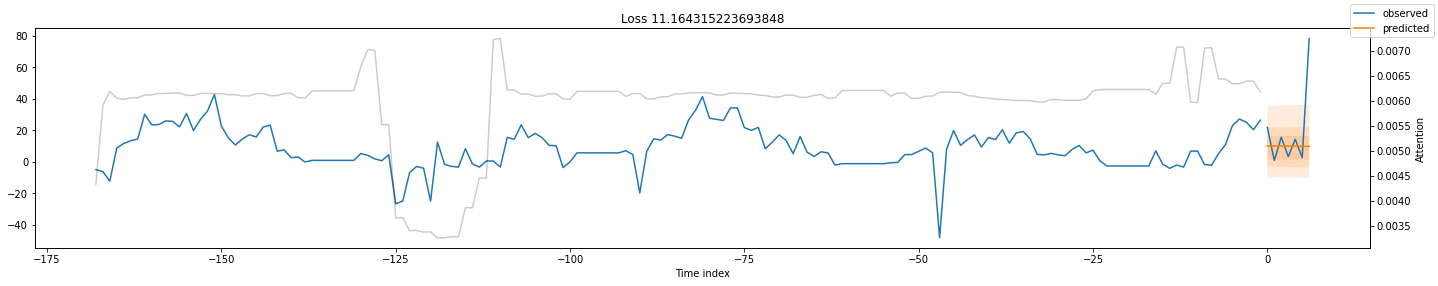

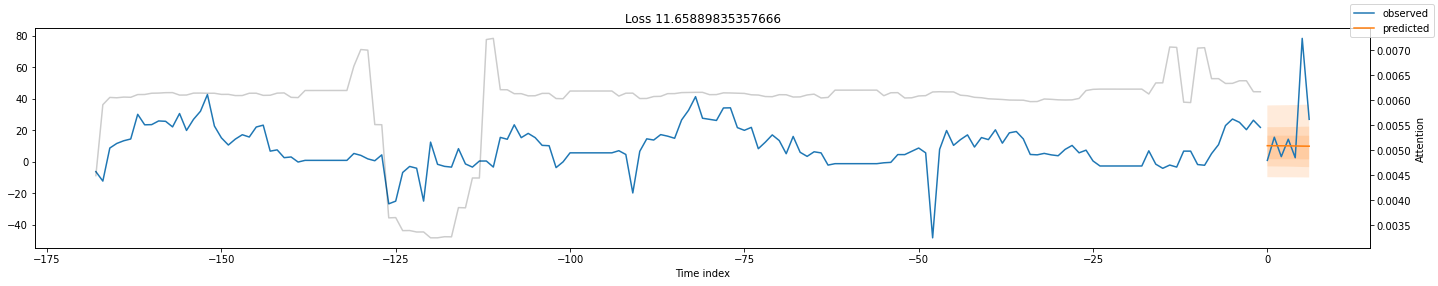

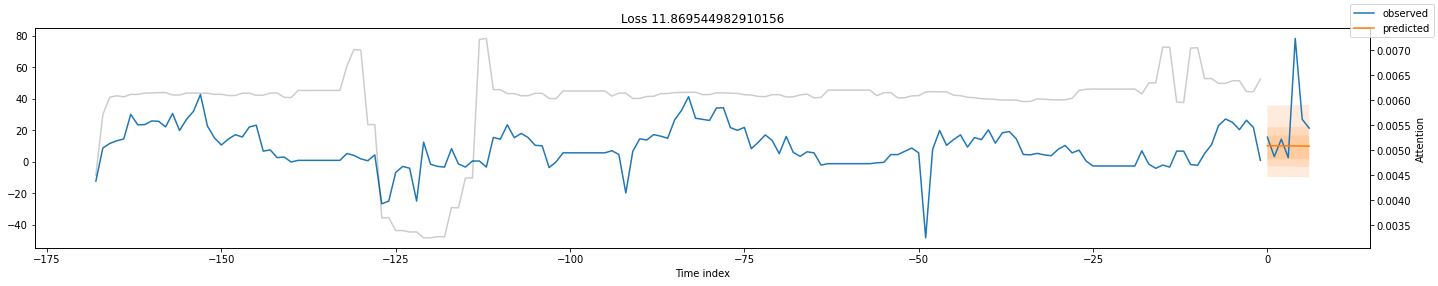

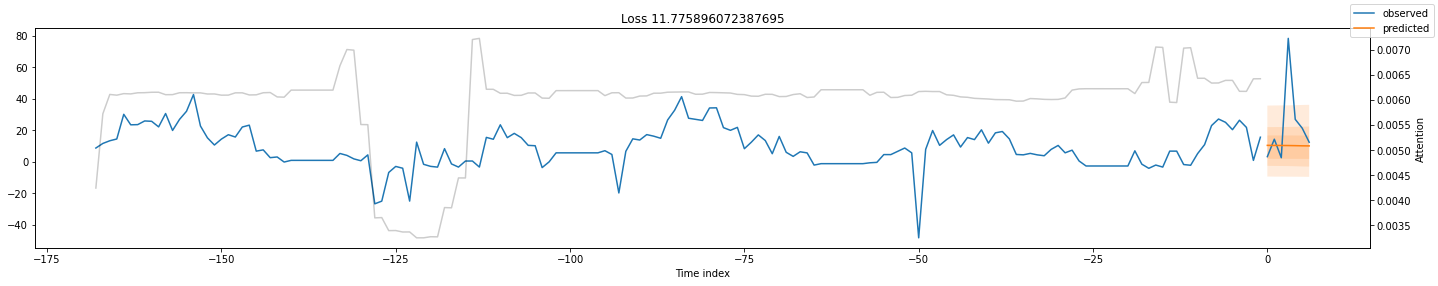

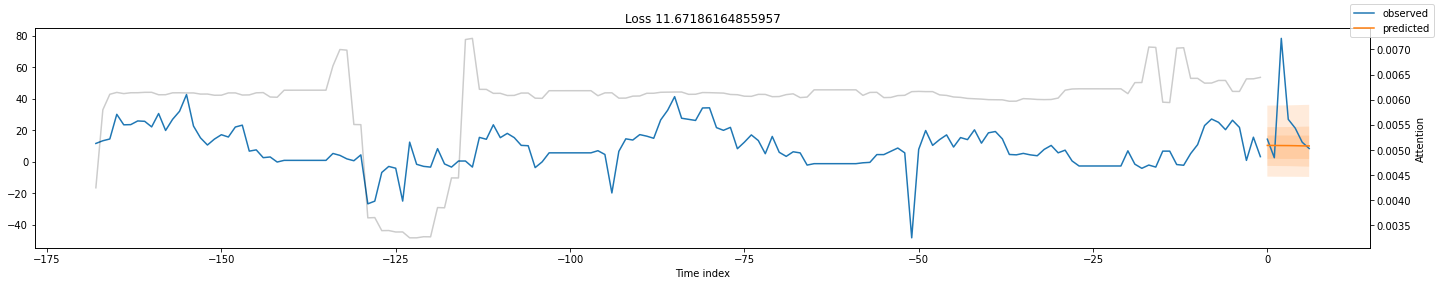

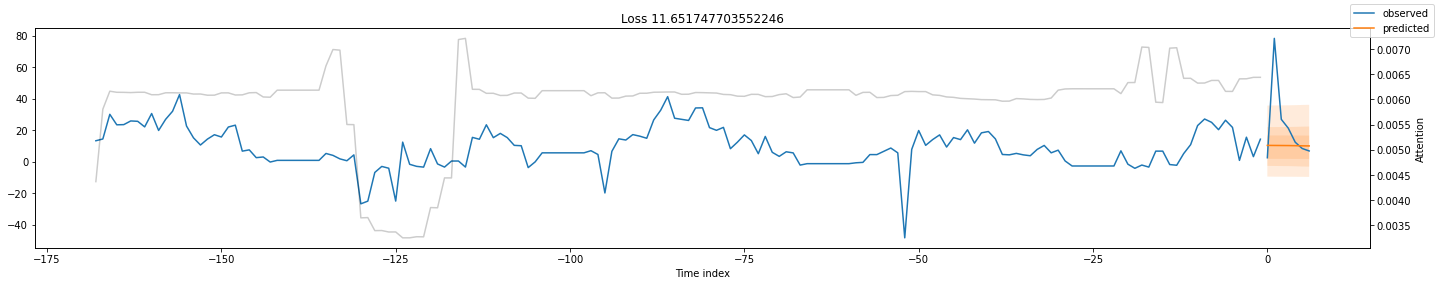

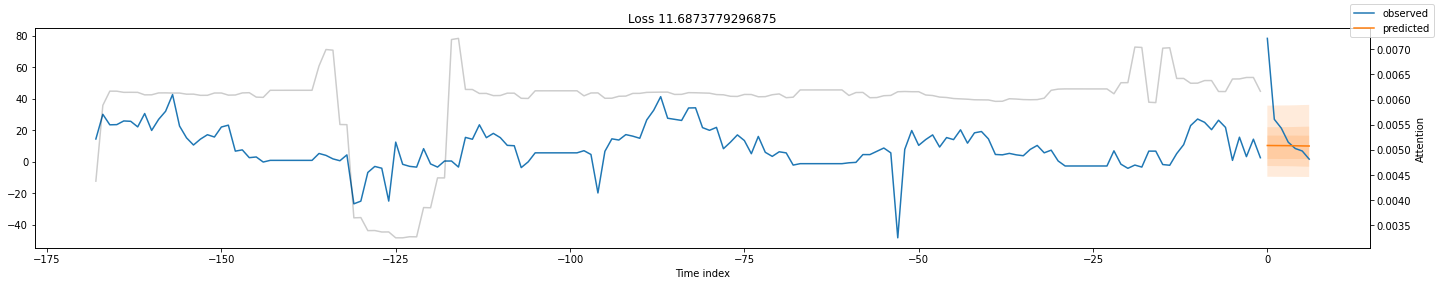

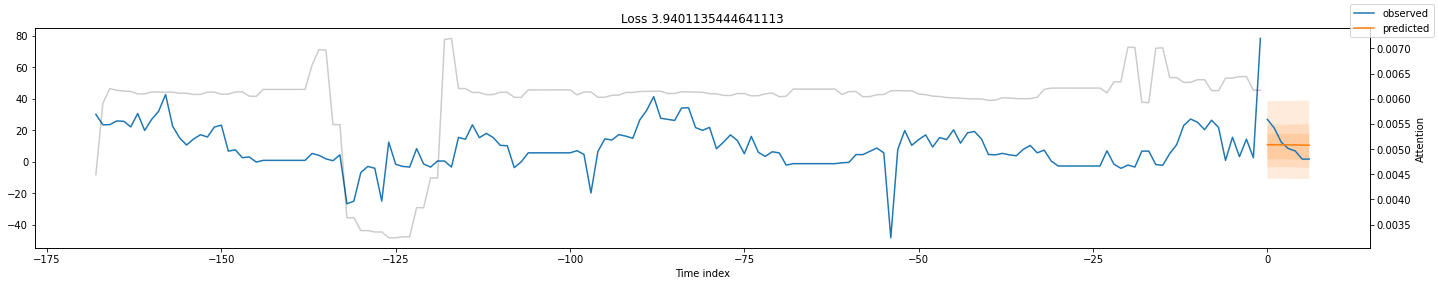

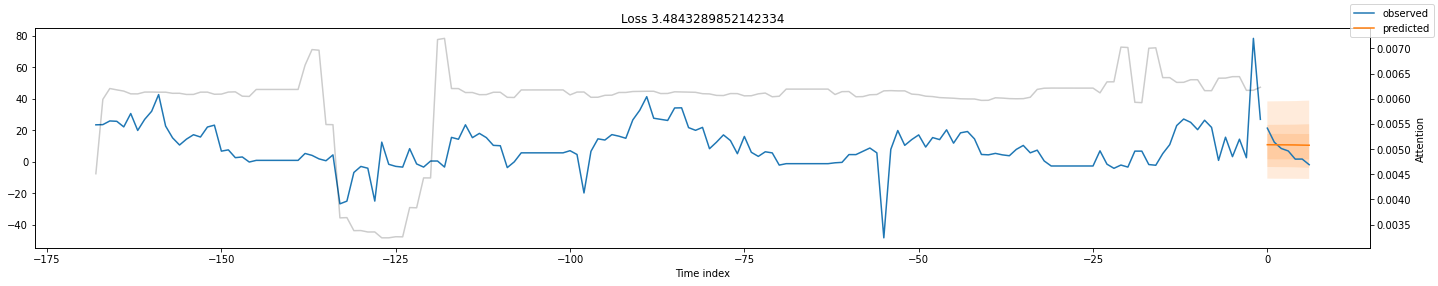

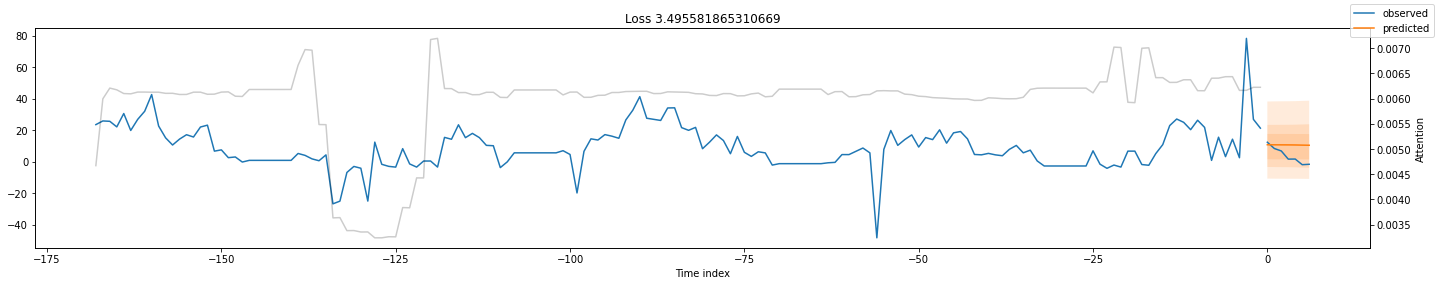

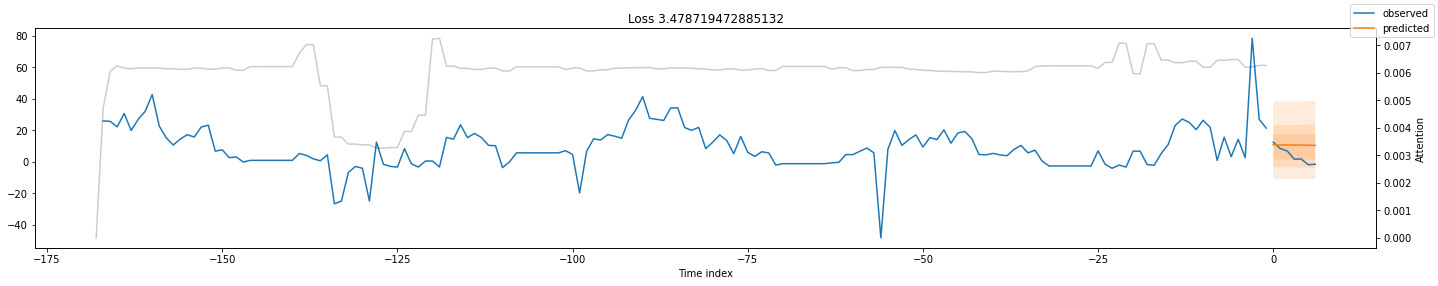

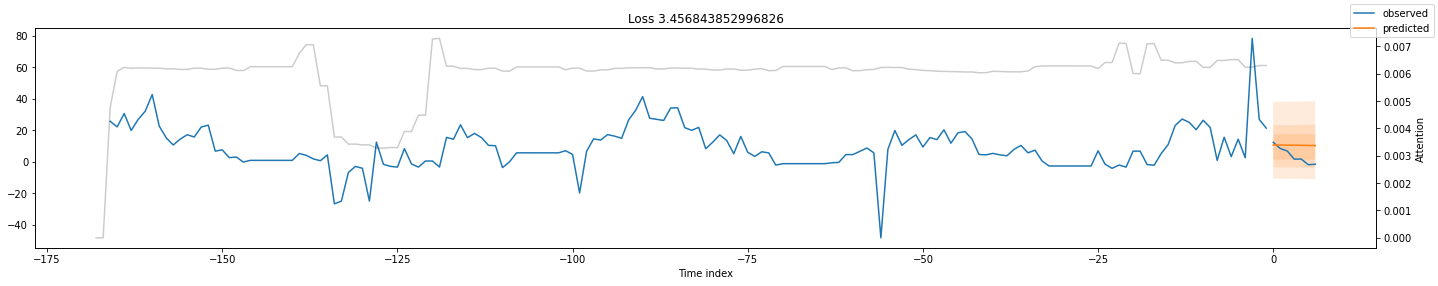

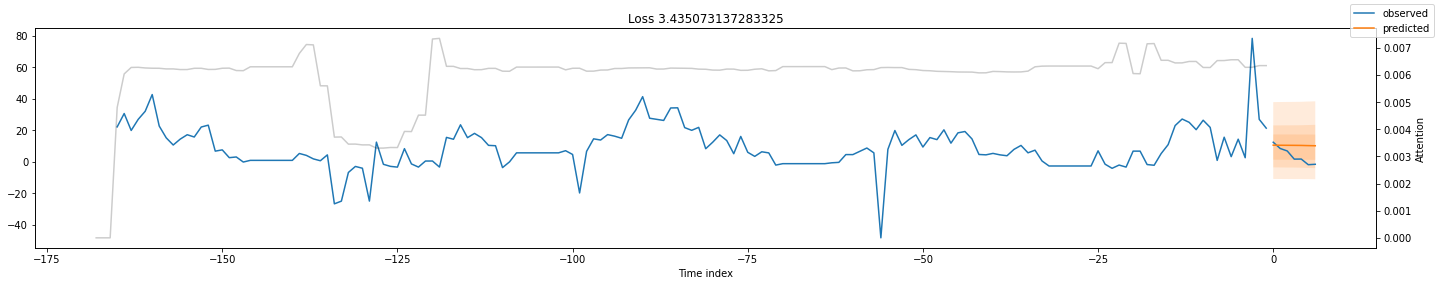

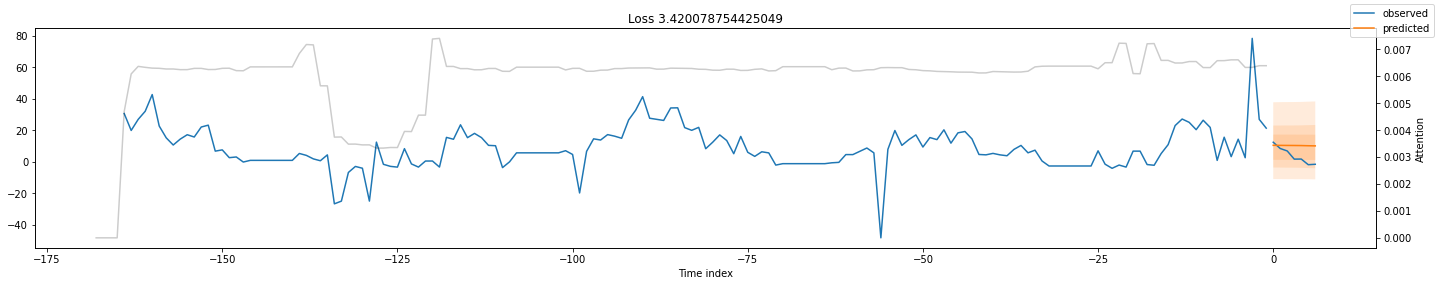

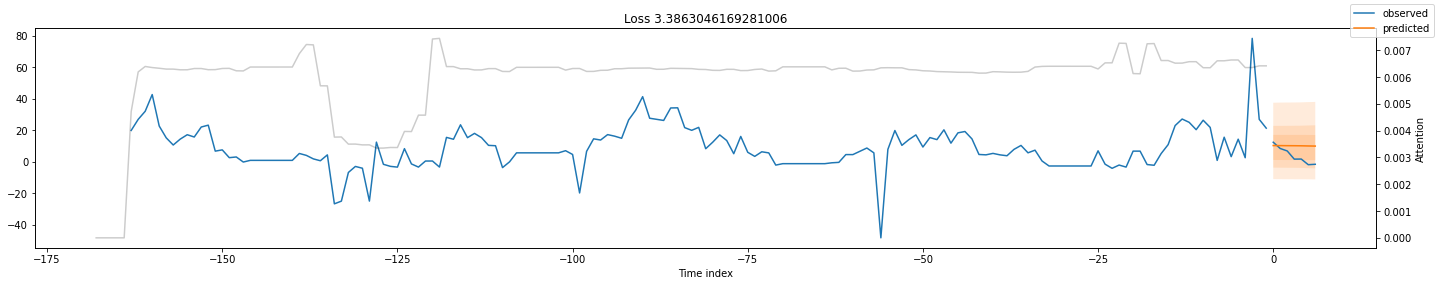

In [142]:
for idx in range(15):
    fig, ax = plt.subplots(figsize=(20, 4)) # number should be the unique number of group = sites in this study
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True, ax=ax);

## Plot

- The gray lines in all previous plots represent the attention scores. Look at those plots again — do you notice anything? Figure 8 shows the findings of Figure 7 and also accounts for the attention scores:

- The attention scores reveal how impactful are those time steps when the model outputs its prediction. 

- **The small peaks reflect the daily seasonality, while the higher peak towards the end probably implies the weekly seasonality.**

**Studying the attention weights of TFT has extra advantages:**

- We can confirm our model captures the apparent seasonal dynamics of our sequences.

- Our model may also reveal hidden patterns because the attention weights of the current input windows consider all past inputs.

- The attention weights plot is not the same as an autocorrelation plot: The autocorrelation plot refers to a particular sequence, while the attention weights here focus on the impact of each timestep by looking across all covariates and time series.


In [ ]:
fig, ax = plt.subplots(figsize=(20, 4))
best_tft.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True, ax=ax)

# Features Importance

{'attention': <Figure size 432x288 with 1 Axes>,
 'static_variables': <Figure size 504x288 with 1 Axes>,
 'encoder_variables': <Figure size 504x522 with 1 Axes>,
 'decoder_variables': <Figure size 504x180 with 1 Axes>}

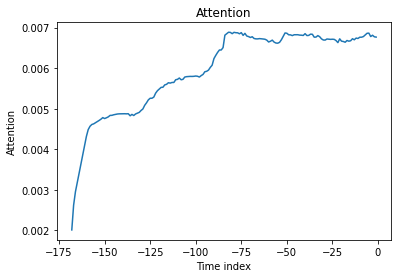

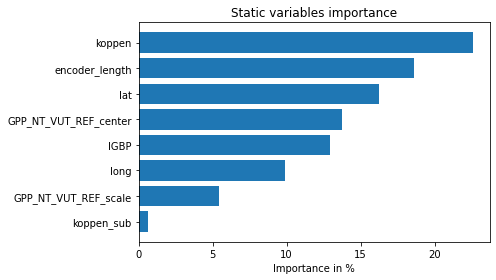

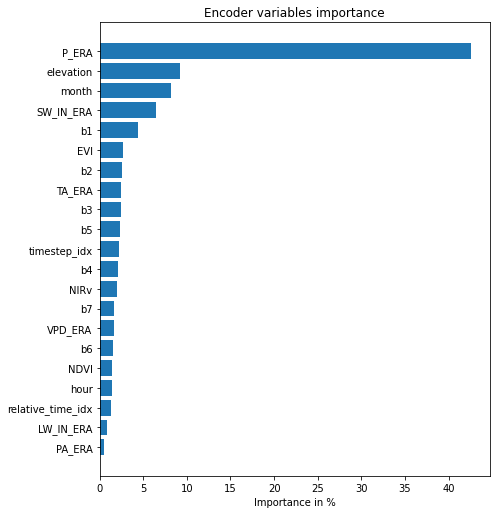

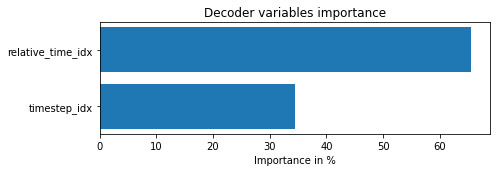

In [143]:
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)
interpretation = best_tft.interpret_output(raw_predictions, reduction="sum")
best_tft.plot_interpretation(interpretation)

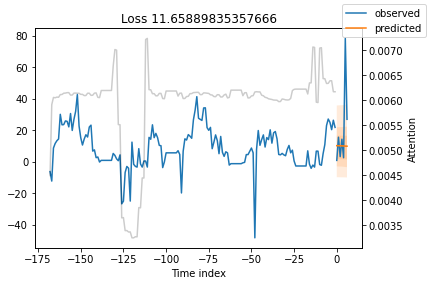

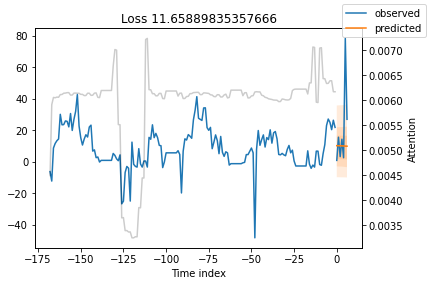

In [150]:
best_tft.plot_prediction(x, raw_predictions, idx=1, add_loss_to_title=True)